In [4]:
%matplotlib inline
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from models.generative.gans.RaLSGAN import RaLSGAN
from models.generative.gans.utils import save_loss

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

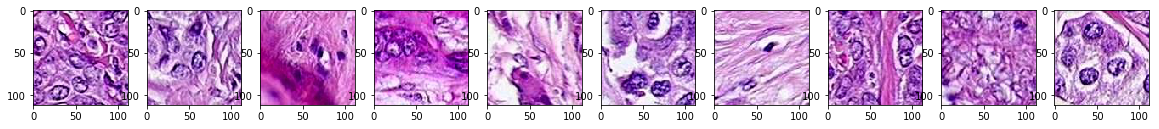

In [5]:
from data_manipulation.data import Data
from models.generative.gans.utils import plot_images

data = Data(dataset='nki', marker='he', patch_h=112, patch_w=112, n_channels=3, batch_size=10)
images, label = data.training.next_batch(100)
images, label = data.training.next_batch(300)
plot_images(plt_num=10, images=images, dim=20)

Epochs 1/10: Generator Loss: 2.9373. Discriminator Loss: 6.599


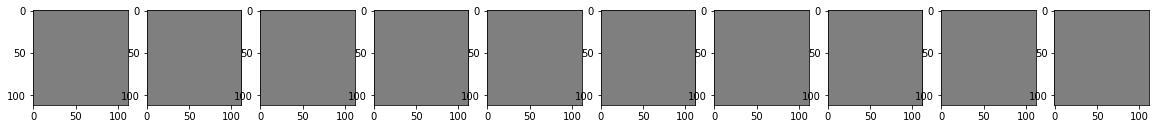

Epochs 1/10: Generator Loss: 1.1097. Discriminator Loss: 4.1333
Epochs 1/10: Generator Loss: 0.902. Discriminator Loss: 3.8305
Epochs 1/10: Generator Loss: 1.2195. Discriminator Loss: 4.214
Epochs 1/10: Generator Loss: 0.912. Discriminator Loss: 3.7687
Epochs 1/10: Generator Loss: 0.9454. Discriminator Loss: 3.6904
Epochs 1/10: Generator Loss: 0.9966. Discriminator Loss: 3.7724
Epochs 1/10: Generator Loss: 1.0172. Discriminator Loss: 3.7925
Epochs 1/10: Generator Loss: 1.2242. Discriminator Loss: 3.8624


KeyboardInterrupt: 

In [6]:
main_path = '/Users/adalbertoclaudioquiros/Documents/Code/UofG/PhD/Cancer_TMA_Generative/data model output/RaLSGAN/'

# Dataset information.
image_width = 112
image_height = 112
image_channels = 3
dataset='nki'
marker='he'
name_run = 'h%s_w%s_n%s_code_refactor' % (image_height, image_width, image_channels)
data_out_path = '%s/%s' % (main_path, name_run)



# Hyperparameters.
epochs = 10
batch_size = 64
z_dim = 100
learning_rate = 5e-5
beta1 = 0.5
alpha = 0.2
use_bn = True

data = Data(dataset, marker, image_height, image_width, image_channels, batch_size)

with tf.Graph().as_default():
    rasgan = RaLSGAN(data, z_dim, use_bn, alpha, beta1, learning_rate, model_name='RaLSGAN')
    rasgan.train(epochs, data_out_path, data)

In [ ]:
save_loss(losses, data_out_path, dim=20)